# Assignment two: hot tips

This notebook is to accompany the second assignment for KYA323: Atomic and nuclear physics at the University of Tasmania.

The content here does not provide solutions, but hopefully will help provide some ideas on how to perform the required computations.

**Version**: 1.0  
**Created**: 12/08/2024 (AJM)  
**Updated**: 12/08/2024 (AJM)

## Hot tip number 1

Using the `Atomic.py` module should supply you with all you need (and more!)

In [1]:
from Atomic import *

Atomic.py - the package for atomic physics content for use in KYA323 has been loaded. 

Core package versions are as follows:
Matplotlib 3.7.1
NumPy 1.25.0


## Hot tip number 2

In order to calculate denisty matricies, you may want to have a refresher on how one represents a state vector in a given basis. The mathematical concept of an [outer product](https://en.wikipedia.org/wiki/Outer_product) may prove useful, along with the [`outer`](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) fuction of the [NumPy](https://numpy.org/doc/stable/index.html) library.

## Hot tip number 3

Differential equations, including coupled differential equations can be solved with the [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) module of the [SciPy](https://docs.scipy.org/doc/scipy/index.html) library.

An example of its usage appears below, which I have taken from some simulations I did for the first-year *bungee egg* experiment.

---

### Bungee egg content 

The equation of motion for the system can be written as

$$
m\frac{d^2 x}{dt^2} = mg - kx - c_d \frac{dx}{dt} 
$$

which is a second-order, linear ordinary differential equation which is relatively easy to solve; however, we use situations such as this to hone our computational abilities.

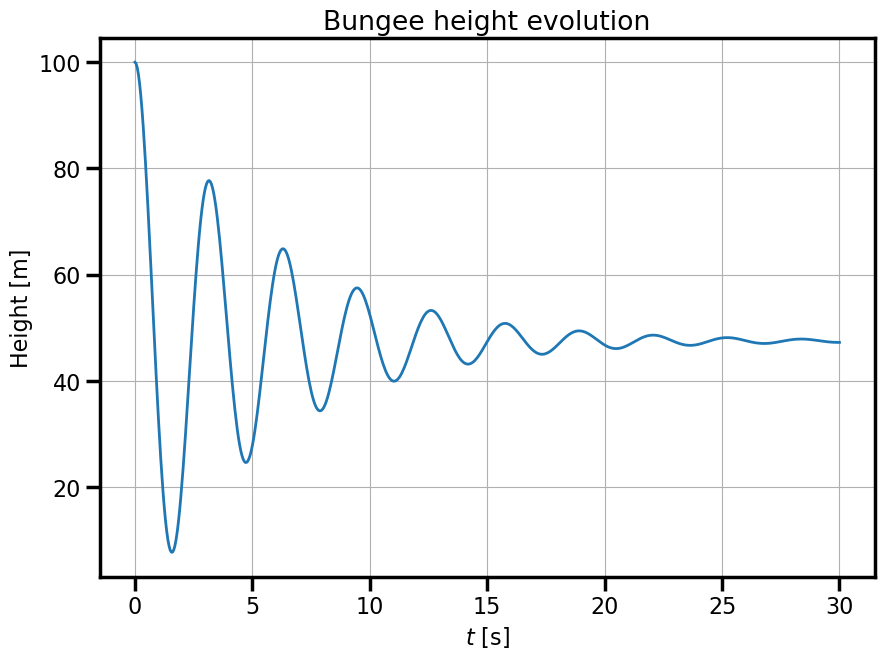

In [2]:
# Constants
g = 9.81 # acceleration due to gravity [m/s^2]
k = 4e2 # spring constant [N/m]
m = 100 # mass of the jumper [kg]
c_d = 35 # drag coefficient [dimensionless]

# Initial conditions
y_0 = 100 # jump height [m]
v_0 = 0 # initial velocity [m/s]
y_eq = 50 # equilibrium position of the rope

# Define the system of equations. y[0] is theta, y[1] is theta_dot
def bungee_ode(t, y):
    """
    bungee_ode specifies the differential equation governing a driven oscillator

    :param t: Time [s]
    :param y: The function to be found
    :return: The form of the differential equation
    """
    
    return (y[1], - g - (k/m)*(y[0]-y_eq) - (c_d/m)*(y[1]))

t_max = 30
            
# solve the ODE, 60 fps
sol = integrate.solve_ivp(bungee_ode, [0, t_max], (y_0, v_0), 
    t_eval=np.linspace(0,t_max,20*t_max))

# output of the solver
y, v = sol.y
t = sol.t

# create a plot of theta vs time
plt.plot(t, y, lw=2, label=r'Numerical')
plt.title('Bungee height evolution')
plt.xlabel('$t$ [s]')
plt.ylabel(r'Height [m]')
plt.grid()
plt.show()

Looks a a bit like damped Rabi oscillations, hey? Sinusoids gonna sinusoid!

## Hot tip number 4

When using a new library, [the documentation](https://qutip.readthedocs.io/en/latest/) can take you *very* far, especially when it is as good that of [`QuTiP`](https://qutip.org/index.html). You never know, you might even be able to compute a whole bunch of other things easily - say, assignment questions - with said library.